In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette("Set2")

%matplotlib inline

In [2]:
def classify_answers(df, q, a1, a2):
    if df[q] == a1:
        return 'no'
    elif df[q] == a2:
        return 'no se'
    else : 
        return 'si'


def classify_answers_gratuidad_3grupos(df):
    if df['q_gratuidad'] == 'a_gratuidad_publicidades' : 
        return 'correcta'
    elif 'a_gratuidad_publicidades' in df['q_gratuidad'].replace(" ", "").split(',') :  # si la respuesta correcta esta dentro de las elegidas
        return 'mixta'
    elif df['q_gratuidad'] == 'a_gratuidad_nose':
        return 'no se'
    else : 
        return 'misconception'

    
def classify_answers_gratuidad(df):
    if 'a_gratuidad_publicidades' in df['q_gratuidad'].split(',') :  # si la respuesta correcta esta dentro de las elegidas
        return 'no' # misconception parcial NO Es misconception
    elif df['q_gratuidad'] == 'a_gratuidad_nose': # consideramos que no se NO es misconception
        return 'no'
    else : 
        return 'si'
    

In [3]:
df = pd.read_csv("../data/respuestas.csv")

In [4]:
df['misconception_yt'] = np.where((df['q_yt']=='a_yt_muchisimascompu') | (df['q_yt']=='a_yt_nose'), 'no', 'si')
df['misconception_yt2'] = df.apply(lambda x: classify_answers(x, q='q_yt', a1='a_yt_muchisimascompu', a2='a_yt_nose'), axis=1)
df['misconception_acceso_fotos'] = np.where((df['q_acceso_fotos']=='a_acceso_fotos_yo') | (df['q_acceso_fotos']=='a_acceso_fotos_nose'), 'no', 'si')
df['misconception_acceso_fotos2'] = df.apply(lambda x: classify_answers(x, q='q_acceso_fotos', a1='a_acceso_fotos_yo', a2='a_acceso_fotos_nose'), axis=1)
df['misconception_mandar_fotos'] = np.where((df['q_mandar_fotos']=='a_mandar_fotos_copia') | (df['q_mandar_fotos']=='a_mandar_fotos_nose'), 'no', 'si')
df['misconception_mandar_fotos2'] = df.apply(lambda x: classify_answers(x, q='q_mandar_fotos', a1='a_mandar_fotos_copia', a2='a_mandar_fotos_nose'), axis=1)
df['misconception_borrar_fotos'] = np.where((df['q_borrar_fotos']=='a_borrar_fotos_nopuedo') | (df['q_borrar_fotos']=='a_borrar_fotos_nose'), 'no', 'si')
df['misconception_borrar_fotos2'] = df.apply(lambda x: classify_answers(x, q='q_borrar_fotos', a1='a_borrar_fotos_nopuedo', a2='a_borrar_fotos_nose'), axis=1)
df['misconception_mensaje_sin_wifi'] = np.where((df['q_mensaje_sin_wifi']=='a_mensaje_sin_wifi_red') | (df['q_mensaje_sin_wifi']=='a_mensaje_sin_wifi_nose'), 'no', 'si')
df['misconception_mensaje_sin_wifi2'] = df.apply(lambda x: classify_answers(x, q='q_mensaje_sin_wifi', a1='a_mensaje_sin_wifi_red', a2='a_mensaje_sin_wifi_nose'), axis=1)
df['misconception_gratuidad3'] = df.apply(lambda x: classify_answers_gratuidad(x), axis=1)
df['misconception_gratuidad'] = np.where((df['q_gratuidad']=='a_gratuidad_publicidades'), 'no', 'si')
df['misconception_gratuidad2'] = df.apply(lambda x: classify_answers(x, q='q_gratuidad', a1='a_gratuidad_publicidades', a2='a_gratuidad_nose'), axis=1)


In [5]:
df['tiene_alguna_misconception'] = np.where((df['misconception_yt2']=='si')|
                                            (df['misconception_gratuidad3']=='si') | \
                                            (df['misconception_acceso_fotos2']=='si') | \
                                            (df['misconception_mandar_fotos2']=='si')  | \
                                            (df['misconception_borrar_fotos2']=='si')  | \
                                            (df['misconception_mensaje_sin_wifi2']=='si'), 'si', 'no')

In [6]:
df[df['tiene_alguna_misconception'] == 'no']
# hay solo 5 chicos que no tiene ninguna misconception


,timestamp,q_edad,q_genero,q_donde_compu,q_que_haces_compu,q_donde_aprendiste_compu,q_que_celu_usas,q_que_haces_celu,q_yt,q_acceso_fotos,...,misconception_mandar_fotos,misconception_mandar_fotos2,misconception_borrar_fotos,misconception_borrar_fotos2,misconception_mensaje_sin_wifi,misconception_mensaje_sin_wifi2,misconception_gratuidad3,misconception_gratuidad,misconception_gratuidad2,tiene_alguna_misconception
47,4/19/2021 16:37:01,9,f,a_donde_compu_casa,"a_que_haces_compu_videos, a_que_haces_compu_ta...",a_donde_aprendiste_compu_casa,a_que_celu_usas_propio,"a_que_haces_celu_chat, a_que_haces_celu_redes,...",a_yt_nose,a_acceso_fotos_yo,...,no,no,no,no,no,no se,no,no,no,no
73,4/25/2021 5:12:01,10,m,a_donde_compu_casa,"a_que_haces_compu_juegos, a_que_haces_compu_vi...",a_donde_aprendiste_compu_casa,a_que_celu_usas_propio,"a_que_haces_celu_videos, a_que_haces_celu_juegos",a_yt_nose,a_acceso_fotos_yo,...,no,no,no,no,no,no,no,no,no,no
76,4/25/2021 20:09:06,9,f,a_donde_compu_casa,"a_que_haces_compu_videos, a_que_haces_compu_tarea",a_donde_aprendiste_compu_casa,a_que_celu_usas_prestado,"a_que_haces_celu_redes, a_que_haces_celu_video...",a_yt_nose,a_acceso_fotos_yo,...,no,no se,no,no se,no,no se,no,no,no,no
79,4/25/2021 23:28:42,10,m,a_donde_compu_casa,a_que_haces_compu_tarea,a_donde_aprendiste_compu_solo,a_que_celu_usas_nouso,a_que_haces_celu_nouso,a_yt_nose,a_acceso_fotos_yo,...,no,no,no,no,no,no,no,no,no,no
112,5/2/2021 23:59:27,9,m,a_donde_compu_casa,"a_que_haces_compu_juegos, a_que_haces_compu_vi...",a_donde_aprendiste_compu_solo,a_que_celu_usas_prestado,"a_que_haces_celu_chat, a_que_haces_celu_videos...",a_yt_muchisimascompu,a_acceso_fotos_yo,...,no,no,no,no,no,no,no,no,no,no


In [7]:
#data frame con presencia de misconceptions en las distintas preguntas

df_misconceptions = df[['misconception_yt', 
                        'misconception_acceso_fotos', 
                        'misconception_mandar_fotos', 
                        'misconception_borrar_fotos', 
                        'misconception_mensaje_sin_wifi', 
                        'misconception_gratuidad3']].copy() # consideramos misconception parcial como SIN MISCONCEPTION y NO SE como SIN MISCONCEPTION

df_misconceptions = df_misconceptions.rename(columns={"misconception_yt": "Youtube",
                                  "misconception_acceso_fotos": "Acceso Fotos",
                                  "misconception_mandar_fotos": "Mandar Fotos",
                                  "misconception_borrar_fotos": "Borrar Fotos",
                                  "misconception_mensaje_sin_wifi": "Mensaje sin WiFi",
                                  "misconception_gratuidad3": "Gratuidad Apps"})

for col in df_misconceptions.columns:
    df_misconceptions[col] = df_misconceptions[col].transform(lambda x: 1.0 if x == 'si' else 0.0)
df_misconceptions.head()


,Youtube,Acceso Fotos,Mandar Fotos,Borrar Fotos,Mensaje sin WiFi,Gratuidad Apps
0,1.0,1.0,1.0,1.0,1.0,0.0
1,1.0,0.0,1.0,0.0,1.0,1.0
2,1.0,0.0,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,1.0,1.0,1.0
4,1.0,0.0,1.0,1.0,1.0,1.0


## Frecuencia de cantidad de misconceptions

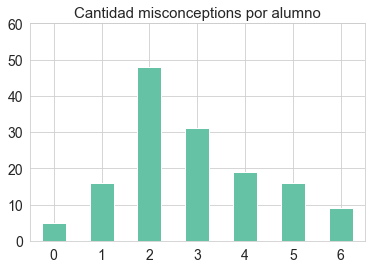

In [8]:
df_misconceptions.sum(axis=1).astype(int).value_counts().sort_index().plot.bar();
plt.title("Cantidad misconceptions por alumno", fontsize=15)
plt.xticks(fontsize=14, rotation=0);
plt.yticks(fontsize=14);
plt.ylim(0,60)
plt.savefig('25.pdf')


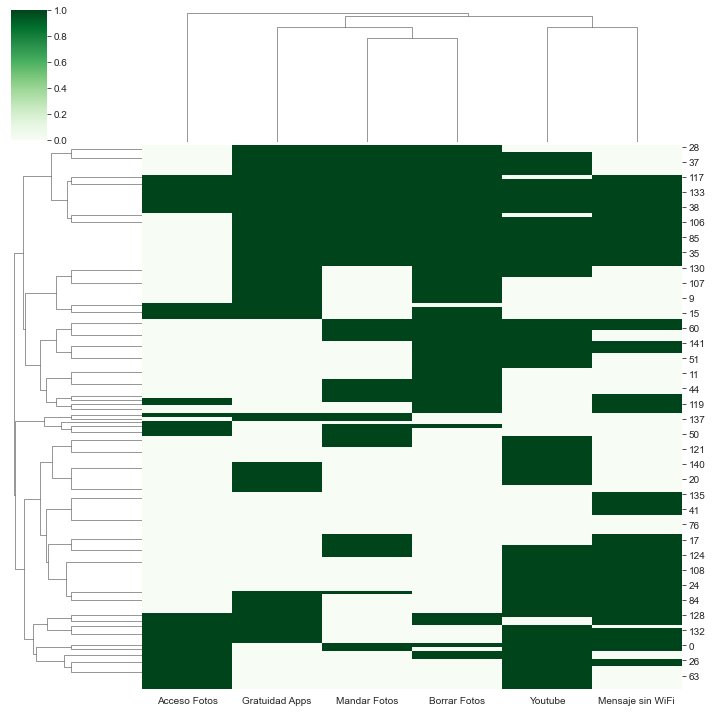

In [9]:
# Clustermap con relaciones entre las preguntas segun las misconceptions que hay en cada una
svm = sns.clustermap(df_misconceptions, cmap='Greens');
figure = svm.fig    
figure.savefig('31.pdf', bbox_inches='tight')


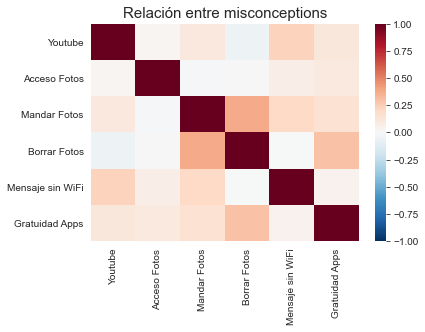

In [10]:
#https://seaborn.pydata.org/generated/seaborn.heatmap.html

#plt.rc('xtick', labelsize=15) 
#plt.rc('ytick', labelsize=15) 

ax = plt.axes()

svm = sns.heatmap(df_misconceptions.corr(method='pearson'), ax=ax, vmax=1, vmin=-1, cmap='RdBu_r');
ax.set_title('Relación entre misconceptions', fontsize=15)
figure = svm.get_figure()    
figure.savefig('28.pdf', bbox_inches='tight')


# * pearson : standard correlation coefficient
# * kendall : Kendall Tau correlation coefficient
# * spearman : Spearman rank correlation

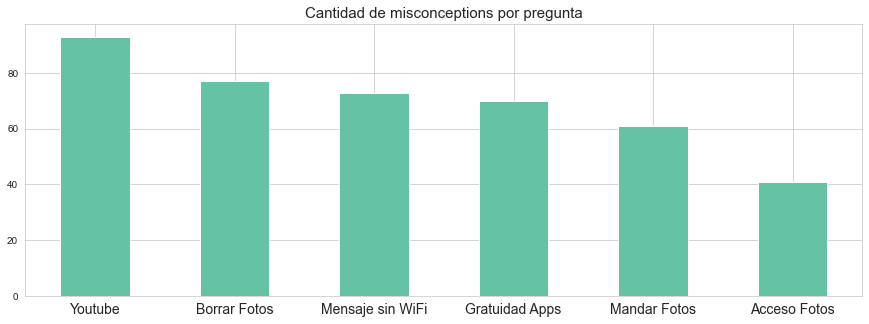

In [11]:
#Cantidad de misconceptions por pregunta, considerando que misconception parcial NO es misconception

df_misconceptions.sum(axis=0).sort_values(ascending=False).plot.bar(figsize=(15,5), rot=0)
plt.title("Cantidad de misconceptions por pregunta", fontsize=15);

plt.xticks(rotation=0,fontsize=14);
plt.savefig('26.pdf')


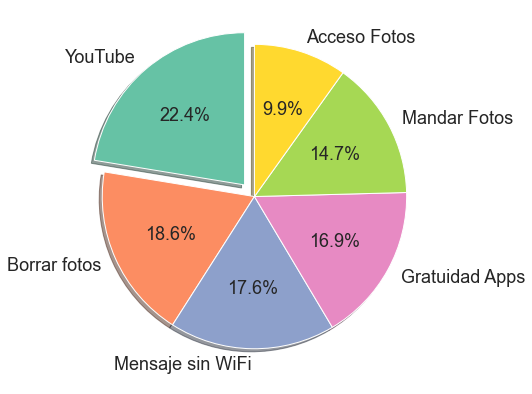

In [12]:
#plt.rc('xtick', labelsize=13) 
#plt.rc('ytick', labelsize=15) 
plt.rcParams['font.size'] = 18.0
labels = ("YouTube", "Borrar fotos", "Mensaje sin WiFi", "Gratuidad Apps", "Mandar Fotos", "Acceso Fotos")
explode = (0.1, 0, 0, 0, 0, 0)

df_misconceptions.sum(axis=0).sort_values(ascending=False).plot.pie(explode=explode,labels=labels, autopct='%1.1f%%',shadow=True, startangle=90, figsize=(12,7));
plt.gca().axes.get_yaxis().set_visible(False)


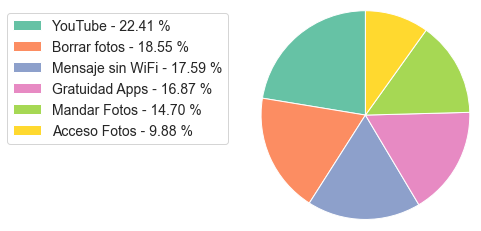

In [13]:
import matplotlib.pyplot as plt
import numpy as np
x = ("YouTube", "Borrar fotos", "Mensaje sin WiFi", "Gratuidad Apps", "Mandar Fotos", "Acceso Fotos")
y = df_misconceptions.sum(axis=0).sort_values(ascending=False)
porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=14)

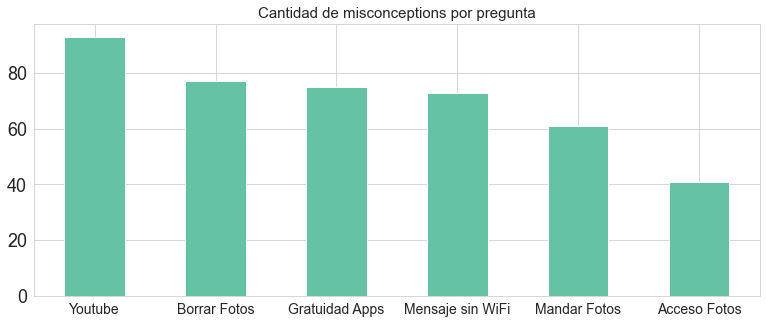

In [14]:
#aca Consideramos a los que tienen misconception parcial como CON misconception.

#https://seaborn.pydata.org/generated/seaborn.clustermap.html
df_misconceptions_parcial = df[['misconception_yt', 
                        'misconception_acceso_fotos', 
                        'misconception_mandar_fotos', 
                        'misconception_borrar_fotos', 
                        'misconception_mensaje_sin_wifi', 
                        'misconception_gratuidad2']].copy() # ACA MISCONCEPTION PARCIAL ES MISCONCEPTION

for col in df_misconceptions_parcial.columns:
    df_misconceptions_parcial[col] = df_misconceptions_parcial[col].transform(lambda x: 1.0 if x == 'si' else 0.0)
df_misconceptions_parcial.head()


df_misconceptions_parcial = df_misconceptions_parcial.rename(columns={"misconception_yt": "Youtube",
                                  "misconception_acceso_fotos": "Acceso Fotos",
                                  "misconception_mandar_fotos": "Mandar Fotos",
                                  "misconception_borrar_fotos": "Borrar Fotos",
                                  "misconception_mensaje_sin_wifi": "Mensaje sin WiFi",
                                  "misconception_gratuidad2": "Gratuidad Apps"})

df_misconceptions_parcial

df_misconceptions_parcial.sum(axis=0).sort_values(ascending=False).plot.bar(figsize=(13,5), rot=0)
plt.title("Cantidad de misconceptions por pregunta", fontsize=15);

plt.xticks(rotation=0,fontsize=14);
plt.savefig('27.pdf')
